<a href="https://colab.research.google.com/github/lukitasmois/ia-aumentada-prevision-de-atrasos-de-vuelos/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

datos = pd.read_csv('https://raw.githubusercontent.com/lukitasmois/ia-aumentada-prevision-de-atrasos-de-vuelos/refs/heads/main/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [3]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [4]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


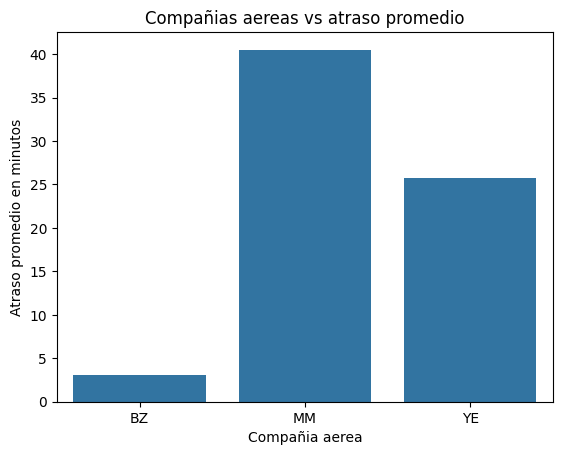

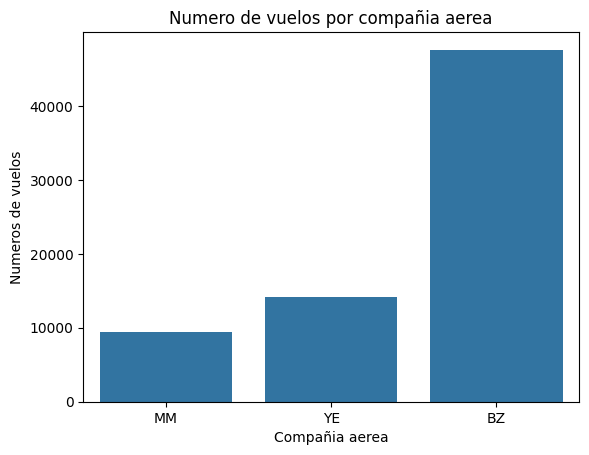

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aereas vs atraso promedio')
plt.xlabel('Compañia aerea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Numero de vuelos por compañia aerea')
plt.xlabel('Compañia aerea')
plt.ylabel('Numeros de vuelos')
plt.show()

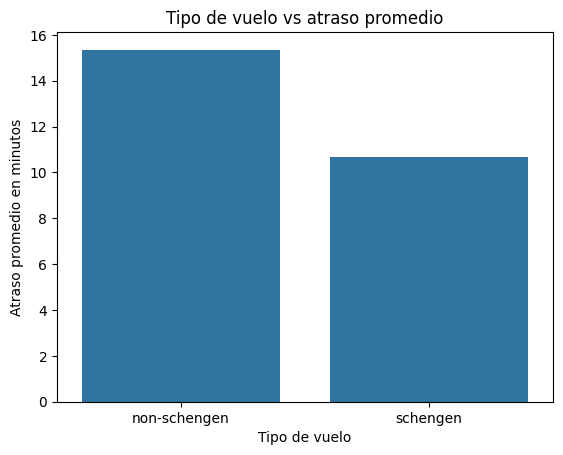

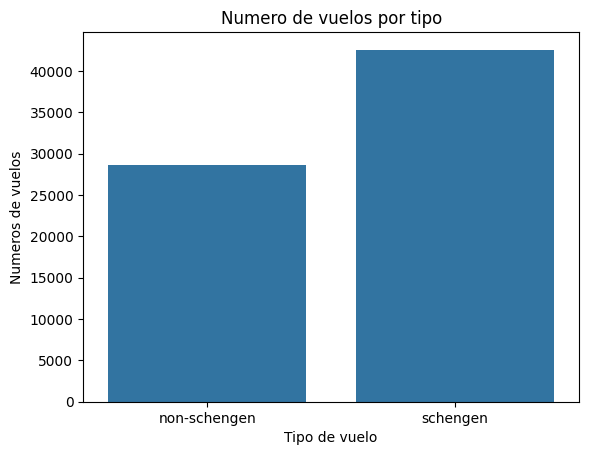

In [6]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Numero de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numeros de vuelos')
plt.show()

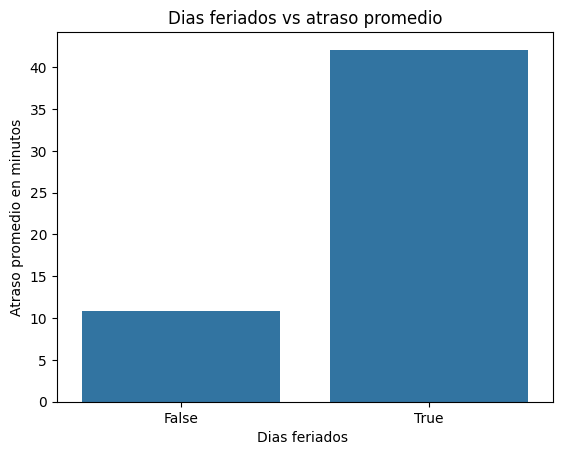

In [7]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados ')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [8]:
datos['aircraft_type'].value_counts().index
# Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175', 'Boeing 737', 'Boeing 777'

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

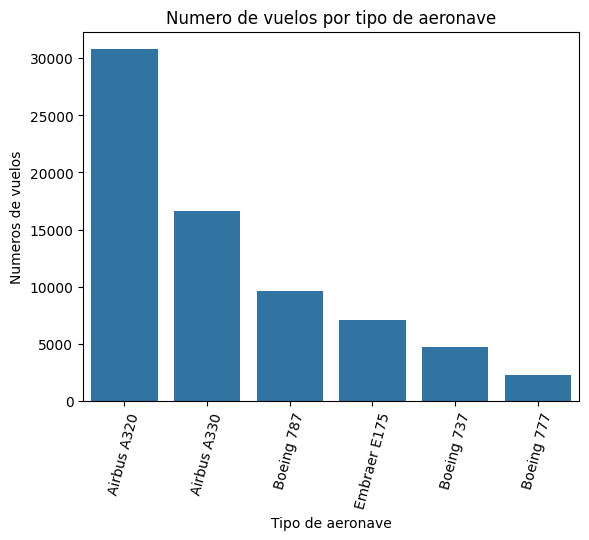

In [9]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order= order)
plt.title('Numero de vuelos por tipo de aeronave')
plt.xticks(rotation=75)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numeros de vuelos')
plt.show()

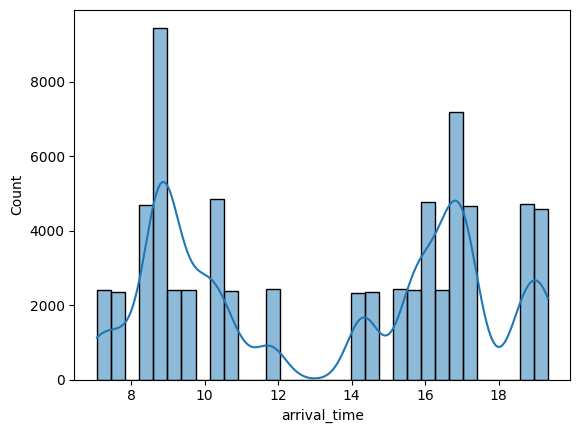

In [10]:
sns.histplot(data=datos, x='arrival_time', kde=True)
plt.show()

In [11]:
import numpy as np

def ancho_bin(df, columna):
  q75,q25 = np.percentile(df[columna], [75,25])
  iqr = q75 - q25
  ancho = 2* iqr * np.power(len(df[columna]), -1/3)
  return ancho

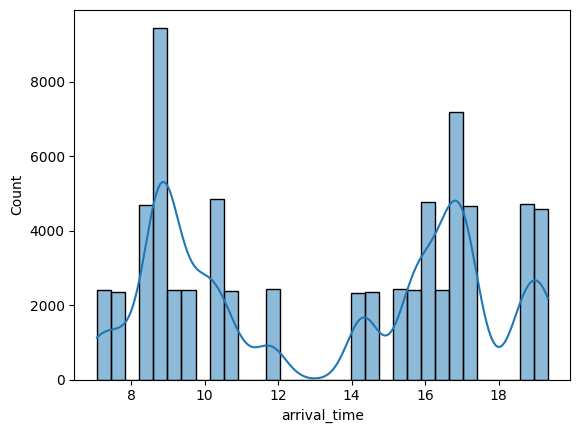

In [12]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)
plt.show()

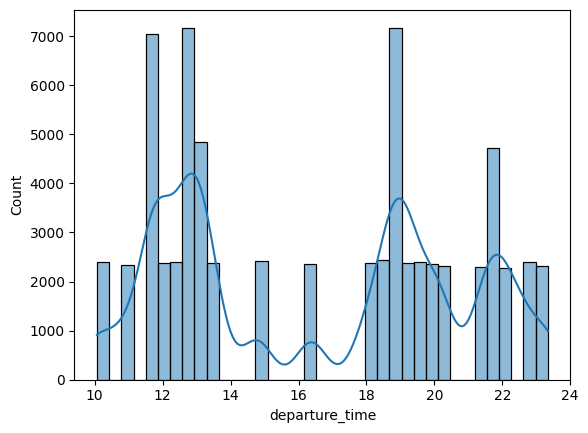

In [13]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)
plt.show()

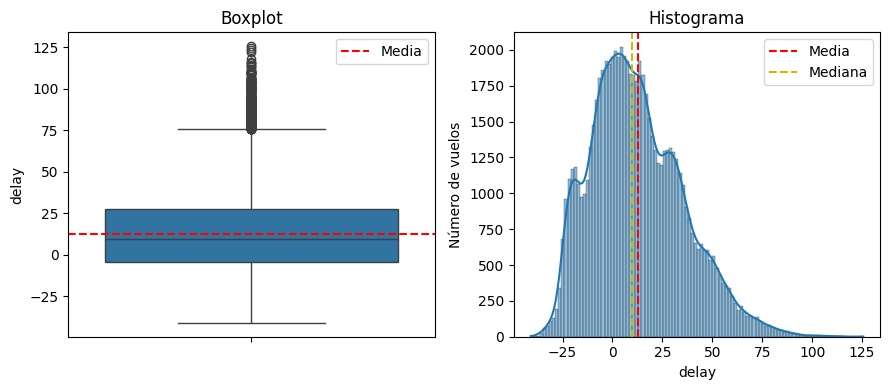

In [14]:
media_retraso = datos['delay'].mean()
mediana_retraso = datos['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=media_retraso, color='r', linestyle='--', label='Media')
axes[0].legend()

ancho_bin_delay = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=axes[1], kde=True, binwidth=ancho_bin_delay)
plt.ylabel('Número de vuelos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=media_retraso, color='r', linestyle='--', label='Media')
axes[1].axvline(x=mediana_retraso, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## **Clase 2**

In [15]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [16]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [17]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
26641,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,316,2014,False,53.654139,2014-11-13,False,Thursday
49699,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,28,2019,False,48.634746,2019-01-29,False,Tuesday
47728,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,261,2018,False,1.037196,2018-09-19,False,Wednesday
65478,19,MM,Airbus A320,schengen,TZF,16.245220,19.245220,350,2021,False,60.668374,2021-12-17,False,Friday
65145,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,328,2021,False,41.748708,2021-11-25,False,Thursday


In [18]:
datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})
datos.head()

/tmp/ipython-input-412939304.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


In [19]:
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})
datos.head()

/tmp/ipython-input-2406077721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
/tmp/ipython-input-2406077721.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [20]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

datos_cod = pd.get_dummies(datos, columns=categoricas, dtype=int)
datos_cod.head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0


In [21]:
df = datos_cod.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
9286,1,17.033688,0,17.024774,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
67791,0,19.341235,0,34.048099,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61954,1,9.344097,0,8.008176,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
40235,1,8.923441,0,1.603152,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22036,1,16.909690,0,31.148589,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7207,0,8.939996,0,14.445819,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
30896,0,15.967963,0,-10.928276,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
50593,1,19.196804,0,-5.424067,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
56181,1,9.344097,0,-1.338398,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
45813,0,8.939996,0,31.709914,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0


## **Clase 2 - 💪 Practica 💪**

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de la biblioteca Pandas y el [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:
```
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()
```
¡Ahora es el momento de poner en práctica otro enfoque!

**Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.**

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
one_hot = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

In [24]:
datos_cod_pract = one_hot.fit_transform(datos)

In [25]:
datos_cod_pract

array([[0.0, 1.0, 0.0, ..., 70.20598057342374,
        Timestamp('2010-01-01 00:00:00'), 0],
       [0.0, 0.0, 1.0, ..., 38.484609338469504,
        Timestamp('2010-01-01 00:00:00'), 0],
       [1.0, 0.0, 0.0, ..., 2.3883054653629494,
        Timestamp('2010-01-01 00:00:00'), 0],
       ...,
       [0.0, 1.0, 0.0, ..., 56.16708013089953,
        Timestamp('2022-12-31 00:00:00'), 1],
       [1.0, 0.0, 0.0, ..., 56.75884437088583,
        Timestamp('2022-12-31 00:00:00'), 1],
       [1.0, 0.0, 0.0, ..., 41.40164813069428,
        Timestamp('2022-12-31 00:00:00'), 1]], dtype=object)

In [26]:
datos_cod_pract = pd.DataFrame(datos_cod_pract, columns=one_hot.get_feature_names_out(datos.columns))
datos_cod_pract

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


## **Clase 3**

In [27]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='delay')
y = df['delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'RMSE': round((rmse ** (1/2)),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [29]:
resultados_regresion = calcular_regresion(y_test, y_pred_dummy)
resultados_regresion

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

## **Clase 3 - 💪 Practica 💪**

Como se indica en la documentación, observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro strategy del DummyRegressor.

In [30]:
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
RMSE: 23.1612
MAE: 18.5646
R2: -0.0


Estrategia: median
RMSE: 23.3446
MAE: 18.4452
R2: -0.0159


Estrategia: quantile
RMSE: 28.7554
MAE: 22.0248
R2: -0.5414


Estrategia: constant
RMSE: 23.3079
MAE: 18.4449
R2: -0.0127




## **Clase 3**

In [31]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


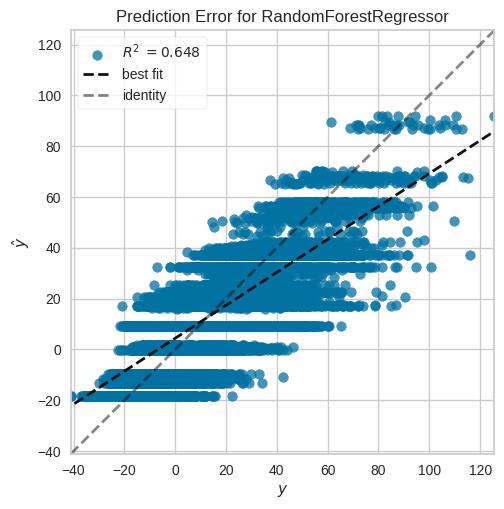

In [32]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

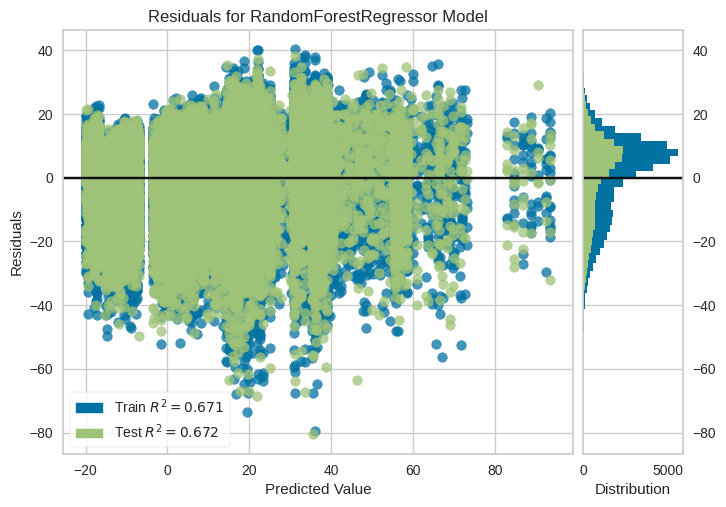

In [33]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test);

In [34]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
resultados_cv = cross_validate(modelo, X_train, y=y_train, scoring=scoring, cv=cv)
resultados_cv

{'fit_time': array([2.60141253, 2.51386452, 2.54897952, 3.55438828, 2.54643965]),
 'score_time': array([0.05193067, 0.05194855, 0.05288124, 0.05152154, 0.05225515]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

## **Clase 4**

In [35]:
len(df.columns)

31

In [36]:
modelo.feature_importances_

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [37]:
importances = modelo.feature_importances_

In [38]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': (importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [39]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [40]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [46]:
param_grid = {
    'max_depth': [5,10,15],
    'min_sample_leaf':[1,2,3],
    'min_sample_split':[2,4,6],
    'n_estimators': [100,150,200]
}

In [47]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5 , shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [49]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [48]:
model_grid.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=200,
                      random_state=42)

In [50]:
y_predict_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_predict_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [51]:
resultados['model_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,model_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [52]:
import pickle

try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
    print('Modelo serializado con exito.')
except Exception as e:
  print('Se presento un error al serializar el modelo: ',str(e))

Modelo serializado con exito.
